In [0]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [0]:
points=np.load('Points.npy')
points

array([[318., 263.],
       [524., 376.],
       [310., 660.],
       [ 87., 479.]])

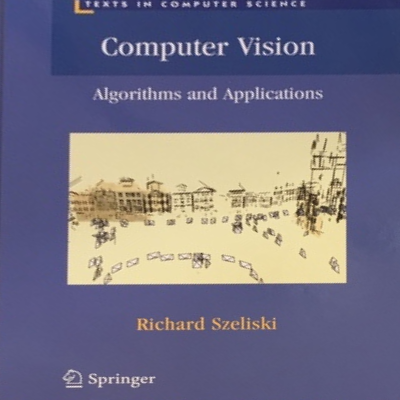

In [0]:
book=cv2.imread('book1.jpg')
pts1 = np.float32([[318., 263.],[524., 376.],[310., 660.],[ 87., 479.]]) 
pts2 = np.float32([[0,0],[400, 0],[400, 400],[0, 400]])
m,status=cv2.findHomography(pts1,pts2)
bookTransform=cv2.warpPerspective(book,m,(400,400))
cv2_imshow(bookTransform)

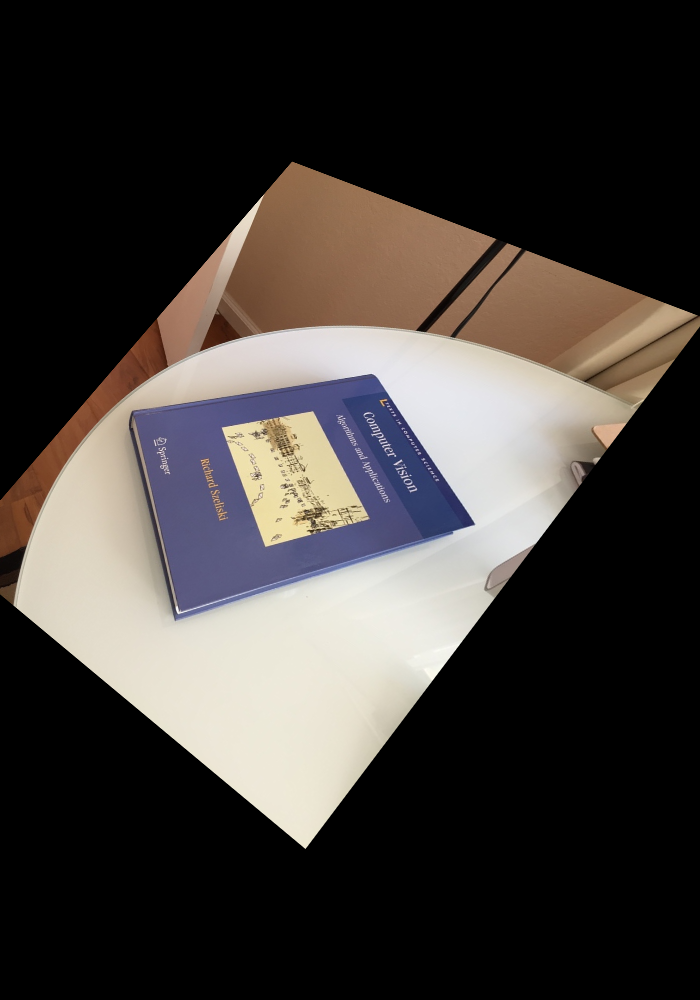

In [0]:
pts_src = np.array([[141, 131], [480, 159], [493, 630],[64, 601]], dtype=float)

pts_dst = np.array([[318, 256],[534, 372],[316, 670],[73, 473]], dtype=float)

m,status=cv2.findHomography(pts_src,pts_dst)
bookTransform=cv2.warpPerspective(book,m,(700,1000))
cv2_imshow(bookTransform)

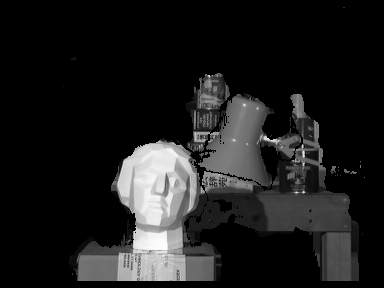

In [0]:
l = cv2.imread('tsukuba_l.png',cv2.IMREAD_GRAYSCALE)
r = cv2.imread('tsukuba_r.png',cv2.IMREAD_GRAYSCALE)

def cut(d,i,th):
  copy=np.copy(i)
  
  for i in range(i.shape[0]):
    for j in range(copy.shape[1]):
      if d[i,j]<th:
        copy[i,j]=0
  return copy

stereo=cv2.StereoBM_create(numDisparities=16,blockSize=15)
d=stereo.compute(l,r)
final=cut(d,l,120)
cv2_imshow(final)

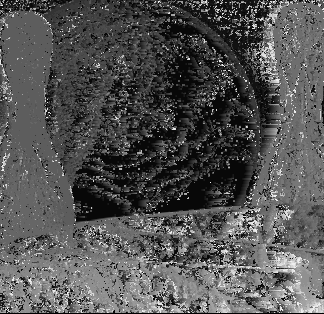

In [0]:
#Task4) You can take the view0.png and view1.png from the link and perform the SSD based patch matching to get the disparity map. (Take this as homework and submit it in you git repository with a report of different cost metrics).
I1=cv2.imread("view0.png",cv2.IMREAD_GRAYSCALE)
I2=cv2.imread("view1.png",cv2.IMREAD_GRAYSCALE)

ssd = []
ht,wdt=I1.shape
disparity=np.zeros([I2.shape[0],I2.shape[1]])
for item in range(I1.shape[0]):
    temp=[]
    for lol in range(I1.shape[1]):
      temp.append([0,0])
    ssd.append(temp)
threshold=30
startpoint=40
windowsize=3
windowsize=int(windowsize/2)
for i in range(startpoint,len(I1)-1):
  for j in range(threshold,len(I1[0])-1):
    temp2=10000000000000
    for k in range(1,threshold-1):
      temp1=np.sum(np.square(I1[i-windowsize:i+windowsize,j-windowsize:j+windowsize]-I2[i-windowsize:i+windowsize,j-k:j-k+1+windowsize])) 
      if(temp1<temp2):
        ssd[i][j]=k
        temp2=temp1
    disparity[i][j]=abs(ssd[i][j])*(255/threshold)

cv2_imshow(np.hstack([disparity[startpoint:wdt,threshold:ht]]))